# This is the minor project on prediction of stock prices 


In [2]:
#first we will import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout

In [3]:
#now we will make a dataframe and read the data
df = pd.read_csv('data_stock.csv')

In [4]:
#let's check the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


To make it as simple we will use only 'open'price


In [5]:
df = df['Open'].values
df = df.reshape(-1,1)

After extracting one column our dataset will be

In [6]:
df.shape

(1009, 1)

 Now we will split the data into two parts i.e. training and testing sets.

In [7]:
training_data = np.array(df[:int(df.shape[0]*0.7)])
testing_data = np.array(df[int(df.shape[0]*0.7):])
print(training_data.shape)
print(testing_data.shape)

(706, 1)
(303, 1)


Now we will use MinMax to scale our data

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_data = sc.fit_transform(training_data)
testing_data = sc.transform(testing_data)
print(training_data[:10]) 
print(testing_data[:7])

[[0.08405677]
 [0.04125007]
 [0.09776684]
 [0.09926358]
 [0.05965997]
 [0.05454111]
 [0.06995753]
 [0.07947675]
 [0.10809436]
 [0.13413763]]
[[0.7679459 ]
 [0.73316174]
 [0.75199072]
 [0.75633121]
 [0.76680837]
 [0.77357365]
 [0.80135308]]


now we will create a function to to analyze and create the set of data

In [9]:
def data(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 



In this we have append for x the last fifty prices and for y we will append next price and then we have converted it in array

Now, we will call our function to create both the datas.

In [10]:
training_x, training_y = data(training_data)
testing_x, testing_y = data(testing_data)

Now, we will create our LSTM model

In [11]:
model = Sequential()
model.add(LSTM(units=111, return_sequences=True, input_shape=(training_x.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=96))
model.add(Dropout(0.3))
model.add(Dense(units=1))

we have taken 111 units in the output with the sequencial and then returned it to make our model layer with 3-d input.
Then we have shaped our set of data.

dropout is 0.3 as to dropout 30% of layers and took dense layer 1 to get a single output.

In [12]:
training_x = np.reshape(training_x, (training_x.shape[0], training_x.shape[1], 1))
testing_x = np.reshape(testing_x, (testing_x.shape[0], testing_x.shape[1], 1))

above we have reshaped it as it is expecting 3 dimensions

as it is regression problem we have used mean square error and adam to update network weights

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')


At last we will save our model 

In [14]:
model.fit(training_x, training_y, epochs=50, batch_size=32)
model.save('stock-model.h5')

Epoch 1/50
21/21 [==============================] - 20s 210ms/step - loss: 0.0486
Epoch 2/50
21/21 [==============================] - 4s 184ms/step - loss: 0.0125
Epoch 3/50
21/21 [==============================] - 4s 182ms/step - loss: 0.0084
Epoch 4/50
21/21 [==============================] - 4s 182ms/step - loss: 0.0076
Epoch 5/50
21/21 [==============================] - 4s 181ms/step - loss: 0.0081
Epoch 6/50
21/21 [==============================] - 4s 185ms/step - loss: 0.0076
Epoch 7/50
21/21 [==============================] - 4s 182ms/step - loss: 0.0075
Epoch 8/50
21/21 [==============================] - 4s 183ms/step - loss: 0.0072
Epoch 9/50
21/21 [==============================] - 4s 183ms/step - loss: 0.0068
Epoch 10/50
21/21 [==============================] - 4s 180ms/step - loss: 0.0068
Epoch 11/50
21/21 [==============================] - 4s 182ms/step - loss: 0.0072
Epoch 12/50
21/21 [==============================] - 4s 181ms/step - loss: 0.0071
Epoch 13/50
21/21 [=====

# now we will load our model and will import from keras to load

In [15]:
from keras.models import load_model



In [16]:
model = load_model('stock-model.h5')


8/8 [==============================] - 1s 93ms/step


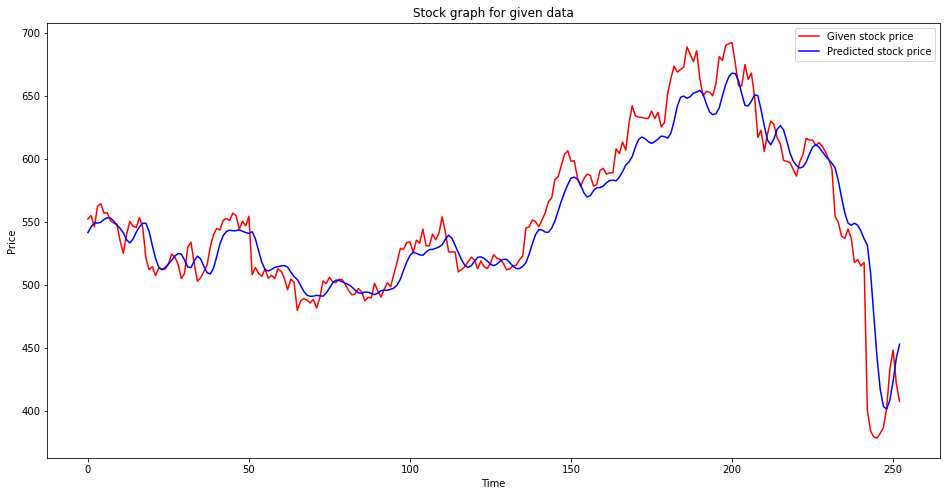

In [18]:
my_pred = model.predict(testing_x)
my_pred = sc.inverse_transform(my_pred)
ytest = sc.inverse_transform(testing_y.reshape(-1, 1))

fig, stock = plt.subplots(figsize=(16,8))
stock.set_facecolor('white')
stock.plot(ytest, color='red', label='Given stock price')
plt.plot(my_pred, color='blue', label='Predicted stock price')
plt.title('Stock graph for given data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# This is the end of our project